In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [1]:
import cv2

img = cv2.imread('d:/coding/data/lomin_data/train/000000.png')

print(type(img))
print(img.shape)
print(type(img.shape))

<class 'numpy.ndarray'>
(2339, 1654, 3)
<class 'tuple'>


In [2]:
h, w, c = img.shape
print('width:  ', w)
print('height: ', h)
print('channel:', c)

width:   1654
height:  2339
channel: 3


In [4]:
# 이미지 회전
img = cv2.imread('d:/coding/data/lomin_data/train/000000.png', cv2.IMREAD_COLOR)
 
img90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE) # 시계방향으로 90도 회전
img180 = cv2.rotate(img, cv2.ROTATE_180) # 180도 회전
img270 = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE) # 반시계방향으로 90도 회전 
                                                         # = 시계방향으로 270도 회전
 

img5 = cv2.rotate(img, cv2.ROTATE_15_CLOCKWISE)

# cv2.imshow('original', img)
# cv2.imshow('rotate90', img90)
# cv2.imshow('rotate180', img180)
# cv2.imshow('rotate270', img270)
cv2.imshow('rotate5', img5)
 
cv2.waitKey(0)
cv2.destroyAllWindows()


AttributeError: module 'cv2.cv2' has no attribute 'ROTATE_15_CLOCKWISE'

In [6]:
''' made by 안산드레아스 이미지 회전하기 필요 패키지 : python-opencv ''' 
import cv2 
''' 이미지를 돌리는 함수 :param 
img : 이미지 
degree : 회전각 ''' 

def im_rotate(img, degree): 
    h, w = img.shape[:-1]
    crossLine = int(((w * h + h * w) ** 0.5)) 
    centerRotatePT = int(w / 2), int(h / 2)     
    new_h, new_w = h, w 
    rotatefigure = cv2.getRotationMatrix2D(centerRotatePT, degree, 1) 
    result = cv2.warpAffine(img, rotatefigure, (new_w, new_h)) 
    return result 

# 현재경로의 이미지 불러오기 
sample = cv2.imread('d:/coding/data/lomin_data/train/000000.png') 
cv2.imshow('org', sample) # 함수 실행하기 

# 원본영상의 자를 영역 원점 x,y좌표 지정. 그리고 새로 생성할 이미지 frame크기 지정 
result = im_rotate(sample, 10) 
cv2.imshow('img', result) 
cv2.waitKey(0) 
cv2.destroyAllWindows()



In [13]:
# 테두리 여백 추가하기
# https://codesample-factory.tistory.com/797

import numpy as np
import cv2

im = cv2.imread('d:/coding/data/lomin_data/train/000000.png')
row, col = im.shape[:2]
bottom = im[row-2:row, 0:col]
mean = cv2.mean(bottom)[0]

bordersize = 100
border = cv2.copyMakeBorder(
    im,
    top=bordersize,
    bottom=bordersize,
    left=bordersize,
    right=bordersize,
    borderType=cv2.BORDER_CONSTANT,
    value=[mean, mean, mean]
)

cv2.imshow('image', im)
cv2.imshow('bottom', bottom)
cv2.imshow('border', border)
cv2.waitKey(0)
cv2.destroyAllWindows()

추가 여분

(중심점 기준 생각)

위, 아래 = 대각선 길이/2 - 높이/2

양 옆 = 대각선 길이/2 - 넓이/2 

total 정사각형이 될 것. 그 안에 직사각형 문서가 바운딩 됨 (중심점 기준)

이미지의 위 와 가까운 곳 찾기 (원본, 90도, 180도, 270도 회전) 4포인트 확인
이미지가 회전은 -45 ~ 45 도 만큼 학습.

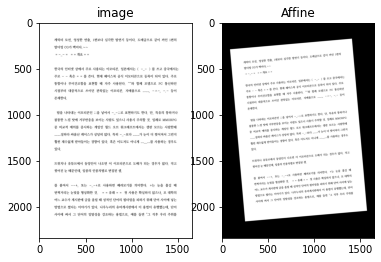

<Figure size 432x576 with 0 Axes>

In [19]:
# 이미지 회전
# https://076923.github.io/posts/Python-opencv-6/

import cv2

src = cv2.imread('d:/coding/data/lomin_data/train/000000.png', cv2.IMREAD_COLOR)

height, width, channel = src.shape

##                         중심점(center), 각도(angle), 비율(scale)
matrix = cv2.getRotationMatrix2D((width/2, height/2), 5, 0.8)
dst = cv2.warpAffine(src, matrix, (width, height))

# cv2.imshow("src", src)
# cv2.imshow("dst", dst)
# cv2.waitKey()
# cv2.destroyAllWindows()

########### 
plt.subplot(121),plt.imshow(img),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Affine')
plt.figure(figsize=(6,8))
plt.show()


In [11]:
print("높이 : ",height)
print("넓이 : ",width)
print("체널 : ",channel)

높이 :  2339
넓이 :  1654
체널 :  3
